In [1]:
from viewLatex import viewLatex
from spermutahedron import *

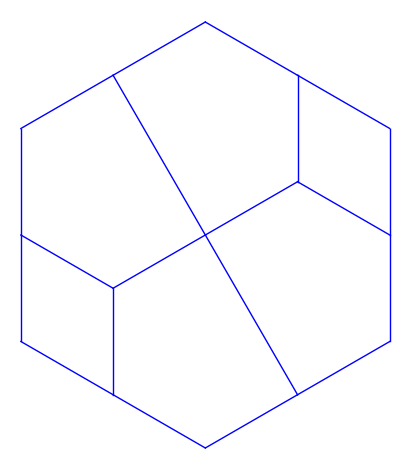

In [2]:
realization2d((0,2,2))

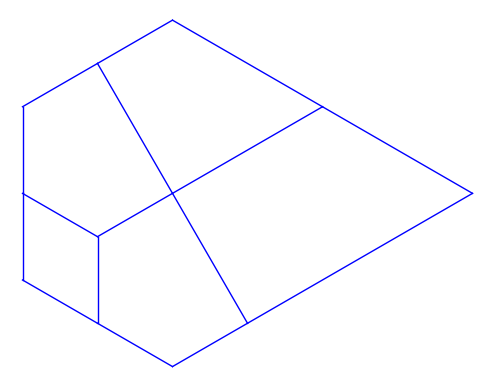

In [3]:
realization2dSTam((0,2,2))

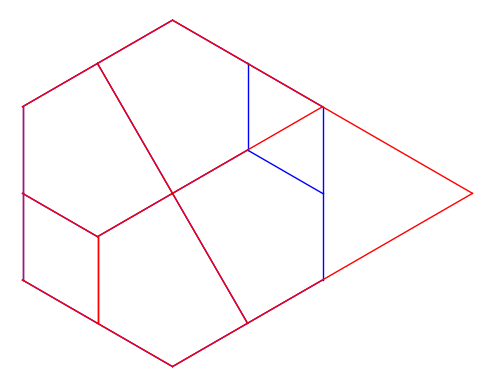

In [4]:
realization2dBoth((0,2,2))

In [5]:
r = realization3d((0,2,2,2))

Graphics3d Object

In [6]:
realization3dSTam((0,2,2,2))

Graphics3d Object

In [7]:
realization3dBoth((0,2,2,2))

Graphics3d Object